# **Interesting insights about 'Shark Tank India' season 1, 2, 3**

1. *Changes and Developments Over Three Seasons*
2. *Common reasons for getting offer*
3. *Strategies Used by Sharks*
4. *Trends in Business Ideas*<br><br>and many more ...

In [304]:
# Importing required libraries

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [305]:
# clean_file_path = "C:/Users/anirudh.bhadauria/data-analytics/shark-tank-analysis/data/shark_tank_clean.csv"
clean_file_path = "data/shark_tank_clean.csv"

In [306]:
# Loading the raw csv file
tank_df = pd.read_csv(clean_file_path, parse_dates = True)

#### What is the total number of episodes (aired) and entrepreneur that came in total and each season seperately?


In [307]:
# General statistics

def total_entrepreneurs_season(season_number):
    return tank_df['presenter_count'].loc[
        tank_df['season_number'] == season_number
    ].sum()
    
total_entrepreneurs = tank_df['presenter_count'].sum()
total_episodes = tank_df.loc[
    tank_df['episode_number'] != 0
]

print(f'Total number of aired episodes: {total_episodes.shape[0]}')
print(f"Total number of entrepreneurs that appeared in Sharktank so far: {total_entrepreneurs}")

Total number of aired episodes: 447
Total number of entrepreneurs that appeared in Sharktank so far: 966


In [308]:
# Plot for number of startups and entreprenuers 

startups_season_one = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[0, 0]
startups_season_two = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[1, 0]
startups_season_three = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[2, 0]

labels_entre = ["Entrepreneurs Season 1", "Entrepreneurs Season 2", "Entrepreneurs Season 3"]
values_entre = [
    total_entrepreneurs_season(1),
    total_entrepreneurs_season(2),
    total_entrepreneurs_season(3)
]

labels_startup = ['Startups in season 1', 'Startups in season 2', 'Startups in season 3']
values_startup = [startups_season_one, startups_season_two, startups_season_three]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}]]
)

fig.add_trace(
    go.Pie(labels=labels_entre, values=values_entre, hole=.45, textinfo='value'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=labels_startup, values=values_startup, hole=.45, textinfo='value'),
    row=1, col=2
)

fig.update_layout(
    font=dict(size=16),
    width=1000,
    height=450,
    margin=dict(l=40, r=40, t=30, b=10),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=True,
    legend=dict(orientation="v", yanchor="bottom", y=0.6, xanchor="right", x=1.5),
    annotations=[
        dict(
            text="Total Entrepreneurs per Season",
            x=0,
            y=1,
            xref="paper",
            yref="paper",
            showarrow=False
        ),
        dict(
            text="Total Startups per Season",
            x=0.95,
            y=1,
            xref="paper",
            yref="paper",
            showarrow=False
        )
    ]
)

fig.show()

#### Total Number of offers recieved and Total number of deals in all the seasons combined, and in different seasons? <br>Also compute the percentage of startups getting offers?

In [309]:
# Percentage of offers 
def percentage_offers(season_number):
    total_offers_received = tank_df['received_offer'].loc[
        tank_df['season_number'] == season_number
    ].sum()
    
    total_startups = tank_df['startup_name'].loc[
        tank_df['season_number'] == season_number
    ].shape[0]

    return ((total_offers_received / total_startups) * 100).round(2)

total_offers_received = tank_df['received_offer'].sum()
total_startups = tank_df['startup_name'].shape[0]

offers = ((total_offers_received / total_startups) * 100).round(2)

print(f"Total Number of offers received: {total_offers_received}")
print(f"Total Number of pitches: {total_startups}")
print()
print(f"Percentage of Startups getting offer: {offers}%")
print()
print(f"Percentage of Startups getting offer in season 1: {percentage_offers(1)}%")
print(f"Percentage of Startups getting offer in season 2: {percentage_offers(2)}%")
print(f"Percentage of Startups getting offer in season 3: {percentage_offers(3)}%")

Total Number of offers received: 321
Total Number of pitches: 478

Percentage of Startups getting offer: 67.15%

Percentage of Startups getting offer in season 1: 63.16%
Percentage of Startups getting offer in season 2: 71.6%
Percentage of Startups getting offer in season 3: 66.24%


#### Total number of startups from different industries with offer received rate and offers conversion rate

In [310]:
startup_industry = tank_df[['industry', 'startup_name']].groupby('industry').count().rename(
    columns = {
        "startup_name": "Startups"
    }
)

startup_received_offer = tank_df[['industry', 'startup_name']].loc[
    tank_df['received_offer'] == 1
].groupby('industry').count().rename(columns = {
    "startup_name": "Got Offer"
})

startup_deal = tank_df[['industry', 'startup_name']].loc[
    tank_df['deal_amount'] != 0
].groupby('industry').count().rename(columns = {
    "startup_name": "Deals"
})

startup_offer = pd.merge(startup_industry, startup_received_offer, on="industry", how='left')
startup_deals = pd.merge(startup_offer, startup_deal, on="industry", how="left")

startup_deals['Got Offer (%)'] = ((startup_deals['Got Offer'] / startup_deals['Startups']) * 100).round(2)
startup_deals['Offers converted (%)'] = ((startup_deals['Deals'] / startup_deals['Got Offer']) * 100).round(2)

startup_deals.sort_values('Got Offer (%)', ascending=False)

,Startups,Got Offer,Deals,Got Offer (%),Offers converted (%)
industry,,,,,
Healthcare,37,33,30,89.19,90.91
Agriculture,4,3,3,75.00,100.00
Education,11,8,7,72.73,87.50
Food,107,77,60,71.96,77.92
Technology,49,35,30,71.43,85.71
Sports,10,7,7,70.00,100.00
Fashion,95,66,54,69.47,81.82
Others,3,2,2,66.67,100.00
Electronics,5,3,3,60.00,100.00


#### Plot for industry, startups, offers and deals for all seasons

In [311]:
industry = startup_deals.index
startups = startup_deals.values[:, 0]
offers = startup_deals.values[:, 1]
deals = startup_deals.values[:, 2]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=industry,
    y=startups,
    name='Startups',
    marker_color='#5e548e'
))

fig.add_trace(go.Bar(
    x=industry,
    y=offers,
    name='Total offers',
    marker_color='#9f86c0'
))

fig.add_trace(go.Bar(
    x=industry,
    y=deals,
    name='Total deals',
    marker_color='#be95c4'
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45, 
    margin=dict(l=40, r=30, t=60, b=40), 
    title="Industry, startups, offers and deals for all seasons"
)

fig.show()

#### Top five Industries that got offer in all the years

In [312]:
startup_deals.sort_values('Got Offer', ascending=False).iloc[:5, :].sort_values('Got Offer (%)', ascending=False)

,Startups,Got Offer,Deals,Got Offer (%),Offers converted (%)
industry,,,,,
Healthcare,37,33,30,89.19,90.91
Food,107,77,60,71.96,77.92
Technology,49,35,30,71.43,85.71
Fashion,95,66,54,69.47,81.82
Manufacturing,50,29,25,58.00,86.21


In [313]:
# Total number of startups from different industries for a particular season

def startup_offer_converted_by_season(season):
    season_startup_industry = tank_df.loc[
        tank_df['season_number'] == season
    ][['industry', 'startup_name']].groupby('industry').count().rename(
        columns = {
            "startup_name": "Startups"
        }
    )
    
    season_startup_received_offer = tank_df.loc[
        tank_df['season_number'] == season
    ][['industry', 'startup_name']].loc[
        tank_df['received_offer'] == 1
    ].groupby('industry').count().rename(columns = {
        "startup_name": "Got Offer"
    })
    
    season_startup_deal = tank_df.loc[
        tank_df['season_number'] == season
    ][['industry', 'startup_name']].loc[
        tank_df['deal_amount'] != 0
    ].groupby('industry').count().rename(columns = {
        "startup_name": "Deals"
    })
    
    season_startup_offer = pd.merge(
        season_startup_industry, 
        season_startup_received_offer, 
        on="industry", how='left'
    )
    season_startup_deals = pd.merge(
        season_startup_offer, 
        season_startup_deal, 
        on="industry", how="left"
    )
    
    season_startup_deals['Got Offer (%)'] = (
        (season_startup_deals['Got Offer'] / season_startup_deals['Startups']) * 100
    ).round(2)
    season_startup_deals['Offers converted (%)'] = (
        (season_startup_deals['Deals'] / season_startup_deals['Got Offer']) * 100
    ).round(2)
    
    season_startup_deals.fillna(0, inplace=True)
    return season_startup_deals

In [314]:
# Plot for total number of startups from different industries for a particular season 

def plot_startup_offer(season_number):
    startup_data = startup_offer_converted_by_season(season_number)
    
    industry = startup_data.index
    startups = startup_data.values[:, 0]
    offers = startup_data.values[:, 1]
    deals = startup_data.values[:, 2]
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=industry,
        y=startups,
        name='Startups',
        marker_color='#5e548e'
    ))
    
    fig.add_trace(go.Bar(
        x=industry,
        y=offers,
        name='Total offers',
        marker_color='#9f86c0'
    ))
    
    fig.add_trace(go.Bar(
        x=industry,
        y=deals,
        name='Total deals',
        marker_color='#be95c4'
    ))
    
    fig.update_layout(
        barmode='group', 
        xaxis_tickangle=-45, 
        title=f"Industry, startups, offers and deals for season {season_number}",
        height=350,
        margin=dict(l=40, r=40, t=60, b=40) 
    )
    
    fig.show()

plot_startup_offer(1)
plot_startup_offer(2)
plot_startup_offer(3)

#### Categorize Startups by Industry and Offers Received

In [315]:
# Grouping industries

startup_industry = tank_df[['industry', 'startup_name']].groupby('industry').count().rename(
    columns = {
        "startup_name": "Number of Startups"
    }
)

offer_industry = tank_df[['industry', 'startup_name']].loc[
    tank_df['received_offer'] == 1
].groupby('industry').count().rename(
    columns = {
        "startup_name": "Offers"
    }
)

deal_offer_industry = tank_df[['industry', 'startup_name']].loc[
    tank_df['deal_amount'] > 0
].groupby('industry').count().rename(
    columns = {
        "startup_name": "Deals"
    }
)

offer_result = pd.merge(startup_industry, offer_industry, on='industry', how="left")
result = pd.merge(offer_result, deal_offer_industry, on="industry", how="left")

result['Offers (%)'] = ((result['Offers'] / result['Number of Startups']) * 100).round(2)
result['Offers converted (%)'] = ((result['Deals'] / result['Offers']) * 100).round(2)

offers_industries = result.sort_values('Offers (%)', ascending=False)
offers_industries

,Number of Startups,Offers,Deals,Offers (%),Offers converted (%)
industry,,,,,
Healthcare,37,33,30,89.19,90.91
Agriculture,4,3,3,75.00,100.00
Education,11,8,7,72.73,87.50
Food,107,77,60,71.96,77.92
Technology,49,35,30,71.43,85.71
Sports,10,7,7,70.00,100.00
Fashion,95,66,54,69.47,81.82
Others,3,2,2,66.67,100.00
Electronics,5,3,3,60.00,100.00


In [316]:
# Plotting industries, offfers, deals

industries = offers_industries.index
startups = offers_industries.iloc[:, 0].values.tolist()
offers = offers_industries.iloc[:, 1].values.tolist()
deals = offers_industries.iloc[:, 2].values.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=industries,
    y=startups,
    name='Total startups',
    marker_color='#ef476f'
))
fig.add_trace(go.Bar(
    x=industries,
    y=offers,
    name='Starupts that Got offer',
    marker_color='#ffd166'
))
fig.add_trace(go.Bar(
    x=industries,
    y=deals,
    name='Offers converted',
    marker_color='#06d6a0'
))

fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    title={
        'text': 'Industry-wise Breakdown of Startup Offers and Deals',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Industries',
        showline=True,
        linewidth=1,
        linecolor='black',
        tickfont=dict(size=12),
    ),
    yaxis=dict(
        title='No. of startups',
        showline=True,
        linewidth=1,
        linecolor='black',
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    )
)

fig.show()

#### What is the average Yearly revenue and Monthly revenue of startups that got offer?

In [317]:
yearly_revenue = tank_df.loc[
    tank_df['received_offer'] == 1
]['yearly_revenue'].mean().round(2)

monthly_sales = tank_df.loc[
    tank_df['received_offer'] == 1
]['monthly_sales'].mean().round(2)

print(f'Average Yearly revenue of startups that got offer: {yearly_revenue} lakhs')
print(f'Average Montly revenue of startups that got offer: {monthly_sales} lakhs')

Average Yearly revenue of startups that got offer: 324.82 lakhs
Average Montly revenue of startups that got offer: 37.26 lakhs


In [324]:
# Yearly / monthly revenue

yearly_revenue = tank_df.loc[
    tank_df['received_offer'] == 1
]['yearly_revenue'].round(2).tolist()

monthly_revenue = tank_df.loc[
    tank_df['received_offer'] == 1
]['monthly_sales'].round(2).tolist()

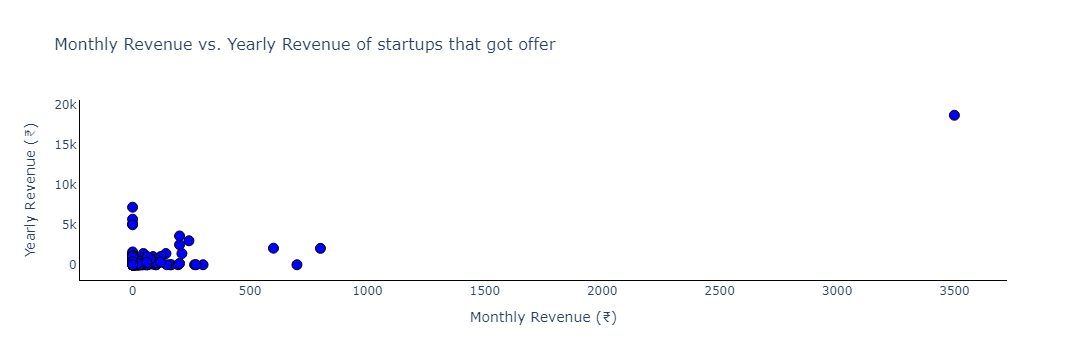

In [325]:
# Plot monthly vs yearly revenue

data = {
    'yearly_revenue': yearly_revenue,
    'monthly_sales': monthly_revenue
}
plot_df = pd.DataFrame(data)

# Prepare data for plotting
yearly_revenue = plot_df['yearly_revenue'].round(2)
monthly_revenue = plot_df['monthly_sales'].round(2)

fig = go.Figure()

# Add trace for monthly revenue
fig.add_trace(go.Scatter(
    x=plot_df['monthly_sales'],
    y=plot_df['yearly_revenue'],
    mode='markers',
    marker=dict(
        color='blue',
        size=10,
        symbol='circle',
        line=dict(width=1, color='black')
    ),
    name='Monthly Revenue'
))

# Update layout for better readability
fig.update_layout(
    title='Monthly Revenue vs. Yearly Revenue of startups that got offer',
    xaxis_title='Monthly Revenue (₹)',
    yaxis_title='Yearly Revenue (₹)',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    legend=dict(
        x=0.1,
        y=1.1,
        orientation='h'
    ),
    title_font_size=16
)

fig.show()

#### What is the percentage of startups getting offers from different Sharks?

In [320]:
# Computing guest sharks

guest_shark_container = []

def seperate_guest_values(value):
    for guest in value.split(","):
        if guest not in guest_shark_container:
            guest_shark_container.append(guest)
    
guest_names = tank_df['all_guest_names'].loc[
    (~tank_df['all_guest_names'].isna()) &
    (tank_df['all_guest_names'].str.contains(",")) |
    (tank_df['all_guest_names']),
].apply(seperate_guest_values)

In [321]:
guest_labels = []
guest_values = []

for name in guest_shark_container:
    guest_present = tank_df.loc[
        (tank_df['guest_present'] > 0) &
        (~tank_df['all_guest_names'].isna()) &
        (tank_df['all_guest_names'].str.contains(name))
    ].shape[0]
    
    guest_invested = tank_df.loc[
        (tank_df['guest_present'] > 0) &
        (~tank_df['all_guest_names'].isna()) &
        (tank_df['all_guest_names'].str.contains(name)) &
        (tank_df['invested_guest_name'].str.contains(name))
    ].shape[0]
    
    guest_percentage = (guest_invested / guest_present) * 100
    
    guest_values.append(np.round(guest_percentage, decimals=2))
    guest_labels.append(name)

In [322]:
# Computing sharks

def startup_shark_offer(invertment_amount, shark_present):
    return ((tank_df[[invertment_amount]].loc[
        tank_df[invertment_amount] > 0
    ].count() / tank_df[[invertment_amount]].loc[
        tank_df[shark_present] == 1
    ].count()) * 100).round(2).values[0]

aman_offers = startup_shark_offer('aman_investment_amount', 'aman_present')
amit_offers = startup_shark_offer('amit_investment_amount', 'amit_present')
peyush_offers = startup_shark_offer('peyush_investment_amount', 'peyush_present')
namita_offers = startup_shark_offer('namita_investment_amount', 'namita_present')
anupam_offers = startup_shark_offer('anupam_investment_amount', 'anupam_present')
ashneer_offers = startup_shark_offer('ashneer_investment_amount', 'ashneer_present')
vineeta_offers = startup_shark_offer('vineeta_investment_amount', 'vineeta_present')

shark_values = [aman_offers, amit_offers, peyush_offers, namita_offers, anupam_offers, ashneer_offers, vineeta_offers]
shark_labels = ["Aman Gupta", "Amit Jain", "Peyush Bansal", "Namita Thapar", "Anupam Mittal", "Ashneer Grover", "Vineeta Singh"]

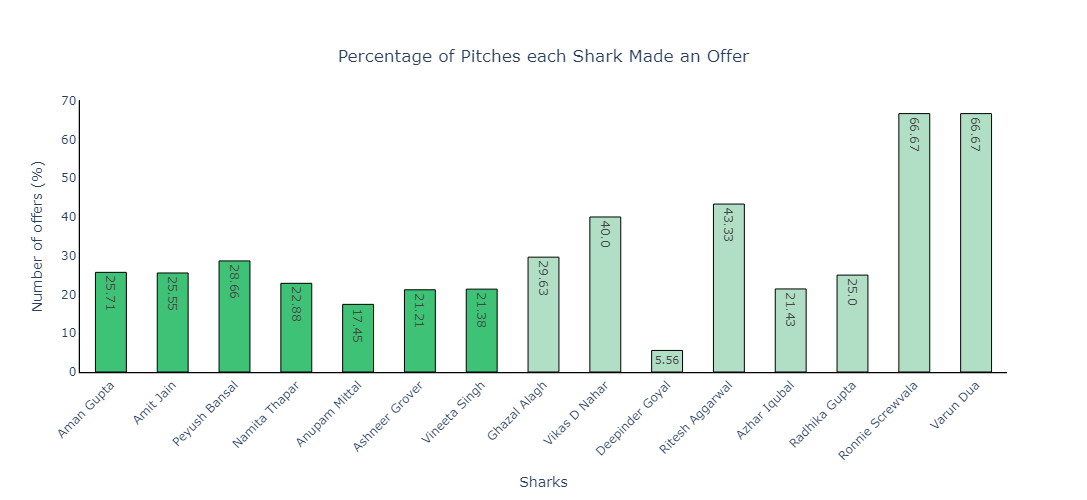

In [323]:
# Plotting the "Percentage of Pitches Each Shark Made an Offer"

colors = ['#3ec276'] * len(shark_labels) + ['#b1dfc6'] * len(guest_labels)

fig = go.Figure(data=[go.Bar(
    x=shark_labels + guest_labels,
    y=shark_values + guest_values,
    textposition='auto',
    width=0.5,
    text=shark_values + guest_values,
    marker_color=colors,
    marker_line_color='black',
    marker_line_width=1,
    opacity=1
)])

fig.update_layout(
    title={
        'text': 'Percentage of Pitches each Shark Made an Offer',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    width=1000,
    height=500,
    xaxis_title='Sharks',
    yaxis_title='Number of offers (%)',
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    xaxis=dict(
        showline=True,
        linewidth=1.25,
        linecolor='black'
    ),
    yaxis=dict(
        showline=True,
        linewidth=1.25,
        linecolor='black'
    ),
)

fig.show()

#### What is the average deal size for startups that appear on Shark Tank India, and how has this changed over time?

#### What is the average deal size for startups that appear on Shark Tank India, and how has this changed over time?
